# Introduction (1)
Initial exploration into opening GPX files in python, and creating plots / maps

_Adapted sources:_
- https://towardsdatascience.com/data-science-for-cycling-how-to-read-gpx-strava-routes-with-python-e45714d5da23
- https://towardsdatascience.com/data-science-for-cycling-how-to-visualize-gpx-strava-routes-with-python-and-folium-21b96ade73c7

In [1]:
# Imports and setup
import gpxpy
import gpxpy.gpx
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

import folium
from IPython.display import display

import plotly.express as px

# Reading GPX file

In [2]:
with open('Halve_Marathon_.gpx', 'r', encoding='UTF-8') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [3]:
gpx.time

datetime.datetime(2021, 11, 20, 10, 20, 55, tzinfo=SimpleTZ("Z"))

In [4]:
gpx.get_track_points_no()

1568

In [5]:
# Convert to pandas dataframe
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

# Drop the first and last 100 points so I don't dox myself
route_df = pd.DataFrame(route_info[100:-100])
route_df.head()

,latitude,longitude,elevation
0,51.471802,5.437449,19.1
1,51.471778,5.437420,19.1
2,51.471647,5.437231,19.1
3,51.471516,5.436992,19.2
4,51.471432,5.436863,19.2


In [6]:
# Save first (starting) point
start = track.segments[0].points[0].latitude, track.segments[0].points[0].longitude
start

(51.471206, 5.448208)

In [7]:
# Calculate the center, for which we take the average of all points
center = route_df[['latitude', 'longitude']].mean().values
center

array([51.48003202,  5.42223983])

# Plotting

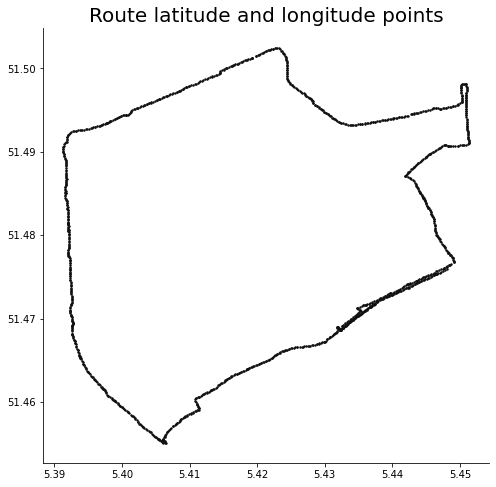

In [8]:
# Simple scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010', s=2)
plt.title('Route latitude and longitude points', size=20);

In [9]:
# Map made with Folium
route_map = folium.Map(
    location=center,
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)
coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=5).add_to(route_map)
display(route_map)

In [10]:
# Map made with Plotly
fig = px.line_mapbox(route_df, lat='latitude', lon='longitude', height=800)
fig.update_layout(mapbox_style='open-street-map', mapbox_zoom=12, margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.update_traces(line=dict(width=5))
fig.show()